In [ ]:
# import the necessary packages
from __future__ import print_function
import imutils  
import cv2
import numpy as np
from google.colab.patches import cv2_imshow # for image display
from io import BytesIO
import os, PIL
from PIL import Image
from skimage import io
import matplotlib.pyplot as plt
from google.colab import files

Escrever um algoritmo de visão computacional para analisar a seqüência de imagens de um vídeo armazenado na galeria, referente à emissão de bolhas de ar em um aquário, de modo a:

a) identificar o background da cena, ou seja, a imagem estática média sem a presença das bolhas,

b) isolar as bolhas e estimar o seu diâmetro equivalente, tomando como modelo uma bolha esférica,

c) estimar a taxa de deformação da bolha entre dois instantes quaisquer.

In [36]:
def grab_bubble(rectangle, image_rgb,filename,frame):
  plt.figure(figsize=(6,12))
  plt.subplot(311)
  plt.title(f"Frame {frame}. Shape={image_rgb.shape}")
  plt.imshow(image_rgb)
  plt.xticks([])
  plt.yticks([])
  
  # grab bubble
  mask = np.zeros(image_rgb.shape[:2], np.uint8)
  bgdModel = np.zeros((1, 65), np.float64)
  fgdModel = np.zeros((1, 65), np.float64)
  cv2.grabCut(image_rgb, mask, rectangle, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)
  mask_2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
  image_rgb_nobg = image_rgb * mask_2[:, :, np.newaxis] # remove background

  gray=cv2.cvtColor(image_rgb_nobg,cv2.COLOR_BGR2GRAY) # convert to  gray
  cntNotBlack = cv2.countNonZero(gray) # get all non black Pixels
  area=cntNotBlack # bubble area
  diam=2*np.sqrt((2*area)/np.pi)

  # print bubble
  plt.subplot(312)
  plt.title(f"Bubble from Frame {frame}. Area={area} pixels^2. Diamet={np.round(diam,1)} pixels")
  plt.imshow(image_rgb_nobg)

  #print background (without bubble)
  fg=image_rgb-image_rgb_nobg
  plt.subplot(313)
  plt.title(f"Background from Frame {frame}")
  plt.imshow(fg)
  plt.xticks([])
  plt.yticks([])

  # save background
  out=Image.fromarray(fg,mode="RGB")
  out.save(filename)
  return image_rgb_nobg,fg

###_______________________________________________________________________________
def average_bubbleless_backgrounds(allfiles):
  imlist=[filename for filename in allfiles if  filename[-4:] in [".jpg",".JPG"]]
  w,h=Image.open(imlist[0]).size
  N=len(imlist)
  arr=np.zeros((h,w,3),np.float)

  for im in imlist:
    imarr=np.array(Image.open(im),dtype=np.float)
    arr=arr+imarr/N

  arr=np.array(np.round(arr),dtype=np.uint8)

  # save and preview final image
  out=Image.fromarray(arr,mode="RGB")
  out.save("average_foreground.jpg")
  ave = io.imread("average_foreground.jpg")
  plt.title("average bubble-less background")
  plt.imshow(ave)


In [12]:
#rectangle params
x=128
y=4
w=100+2
h=200+2
rectangle = (x,y, w, h)

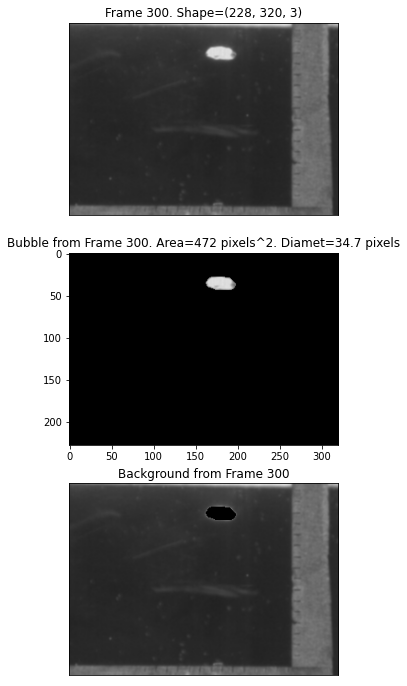

In [17]:
filename="fore_300.jpg"
frame=300
image = io.imread("frame_300.jpg") # read file in BGR
image = cv2.GaussianBlur(image, (3,3), 0) # Gaussian blurring to remove noise 
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Convert from BGR to RGB
image_rgb_nobg,fg=grab_bubble(rectangle, image_rgb,filename,frame)

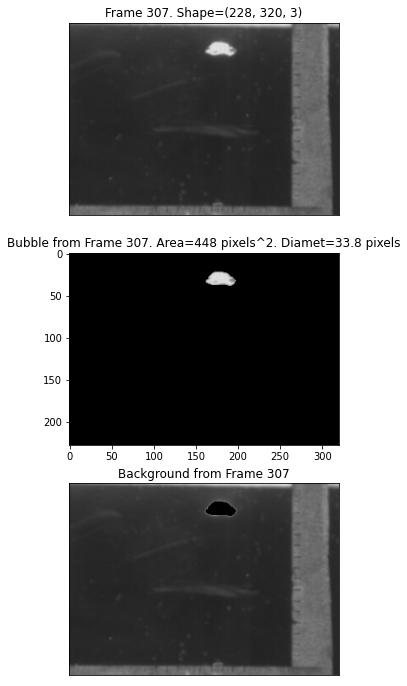

In [18]:
filename="fore_307.jpg"
frame=307
image = io.imread("frame_307.jpg") # read file in BGR
image = cv2.GaussianBlur(image, (3,3), 0) # Gaussian blurring to remove noise 
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Convert from BGR to RGB
image_rgb_nobg,fg=grab_bubble(rectangle, image_rgb,filename,frame)

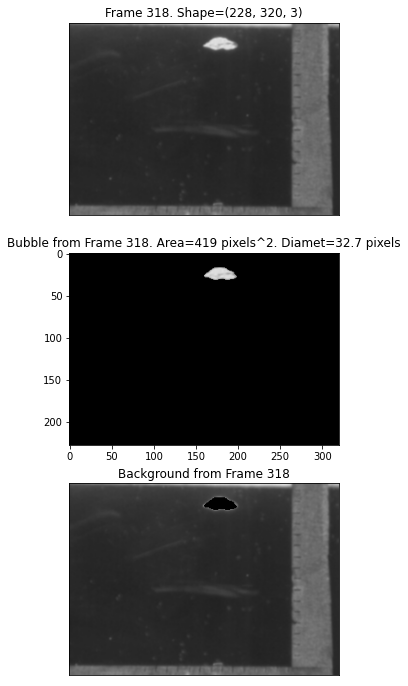

In [28]:
filename="fore_318.jpg"
frame=318
image = io.imread("frame_318.jpg") # read file in BGR
image = cv2.GaussianBlur(image, (3,3), 0) # Gaussian blurring to remove noise 
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Convert from BGR to RGB
image_rgb_nobg,fg=grab_bubble(rectangle, image_rgb,filename,frame)

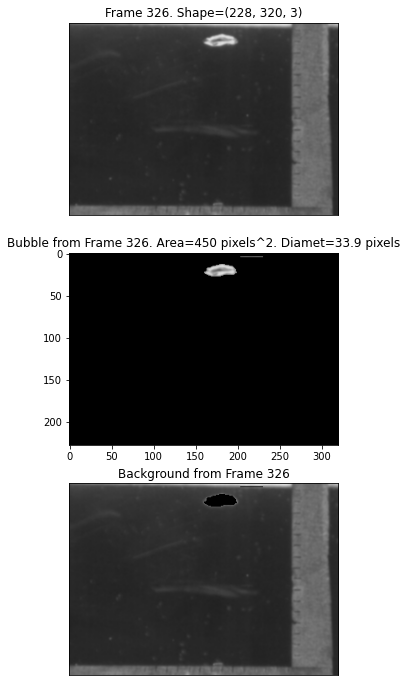

In [21]:
filename="fore_326.jpg"
frame=326
image = io.imread("frame_326.jpg") # read file in BGR
image = cv2.GaussianBlur(image, (3,3), 0) # Gaussian blurring to remove noise 
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Convert from BGR to RGB
image_rgb_nobg,fg=grab_bubble(rectangle, image_rgb,filename,frame)

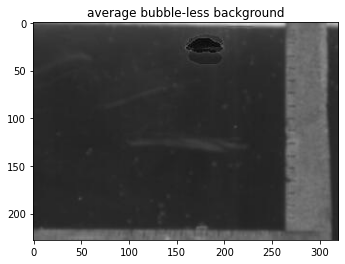

In [37]:
allfiles=['fore_300.jpg','fore_307.jpg','fore_318.jpg','fore_326.jpg']
average_bubbleless_backgrounds(allfiles)